**Importing modules**

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc

**Loading data, making test train split**

In [38]:
df = pd.read_csv('iris.csv')
df_train, df_test = tts(df) #defaultly, train is 0.75 and test is 0.25

X_train = df_train[df_train.columns[:-1]]
Y_train = df_train[df_train.columns[-1]]

X_test = df_test[df_test.columns[:-1]]
Y_test = df_test[df_test.columns[-1]]

In [39]:
df_train.head()

,s_l,s_w,p_l,p_w,species
35,5.0,3.2,1.2,0.2,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
128,6.4,2.8,5.6,2.1,Iris-virginica


**Making Patches**

In [40]:
r_patch = mpatches.Patch(color='red',label='Iris-setosa')
g_patch = mpatches.Patch(color='green',label='Iris-versicolor')
b_patch = mpatches.Patch(color='blue',label='Iris-virginica')

d = {'Iris-setosa':'r','Iris-versicolor':'g','Iris-virginica':'b'}

**Plotting lengths of sepal and petal**

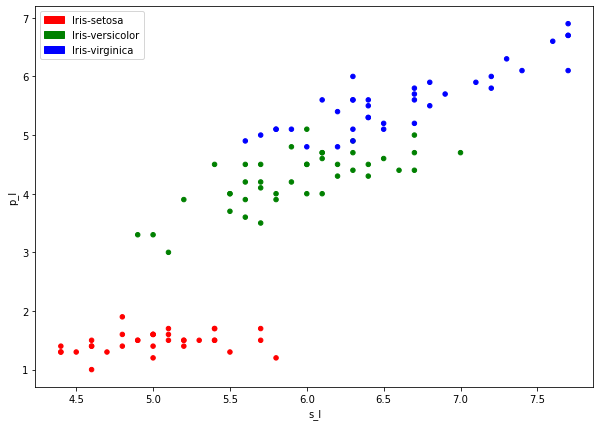

In [41]:
matplotlib.rcParams['figure.figsize'] = [10,7]

df_train.plot(kind='scatter',x='s_l',y='p_l',c=[d[i] for i in df_train.species])
plt.legend(handles=[r_patch,g_patch,b_patch])
plt.show()

**Plotting width of petal and sepal**

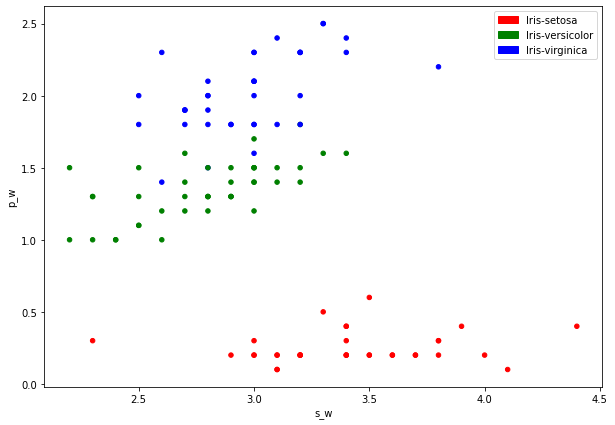

In [42]:
df_train.plot(kind='scatter',x='s_w',y='p_w',c=[d[i] for i in df_train.species])
plt.legend(handles=[r_patch,g_patch,b_patch])
plt.show()

**Training decision tree classifier and getting preditions**

In [43]:
classifier = dtc()
classifier.fit(X_train, Y_train)
preds = classifier.predict(X_test)
res = pd.DataFrame({'preds':preds,'real':Y_test})
score = (res.preds == res.real).sum()/len(Y_test)
print(f'Score: {score}')

Score: 0.9473684210526315


**Length based plotting**

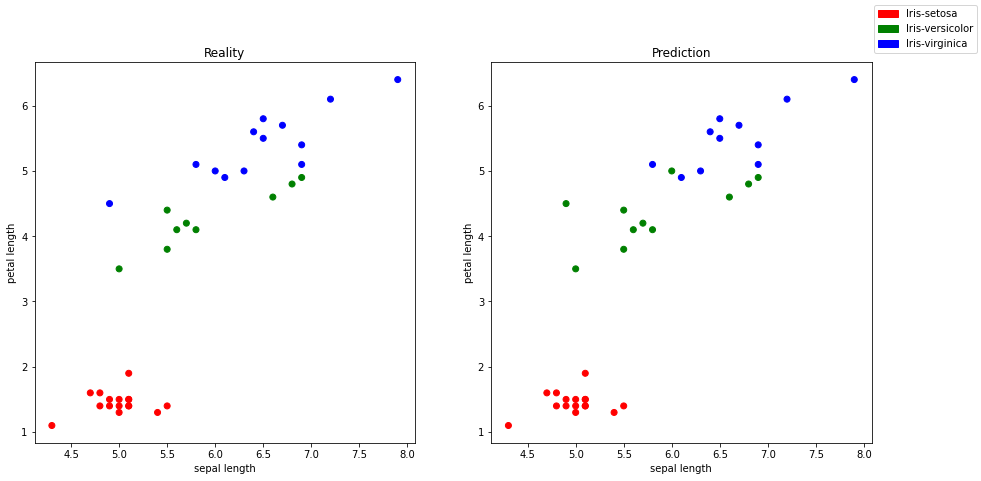

In [44]:
matplotlib.rcParams['figure.figsize'] = [15,7]

fig, axs = plt.subplots(1,2)
axs[0].scatter(X_test.s_l, X_test.p_l, c = [d[i] for i in Y_test])
axs[0].set_title('Reality')
axs[0].set_xlabel('sepal length')
axs[0].set_ylabel('petal length')

axs[1].scatter(X_test.s_l, X_test.p_l, c = [d[i] for i in preds])
axs[1].set_title('Prediction')
axs[1].set_xlabel('sepal length')
axs[1].set_ylabel('petal length')

fig.legend(handles=[r_patch,g_patch,b_patch])
plt.show()

**Width based plotting**

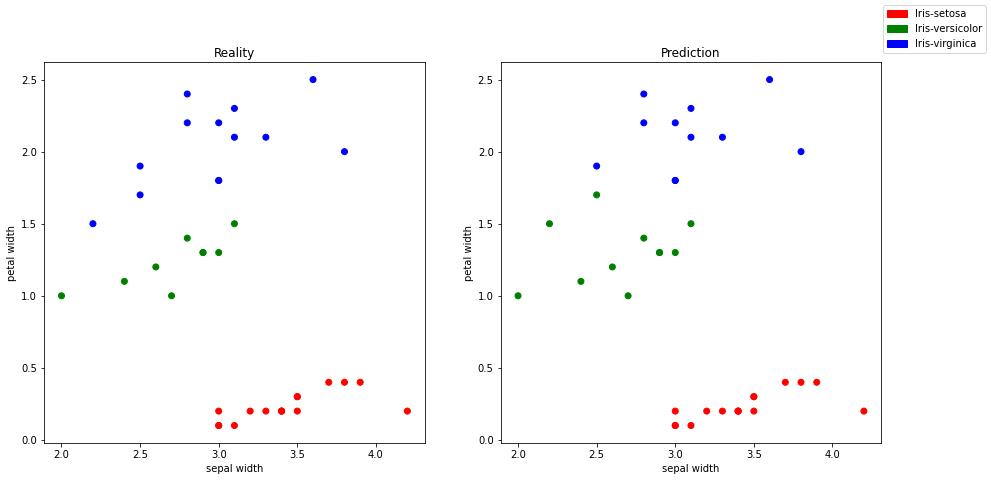

In [45]:
fig1, axs1 = plt.subplots(1,2)
axs1[0].scatter(X_test.s_w,X_test.p_w, c = [d[i] for i in Y_test])
axs1[0].set_title('Reality')
axs1[0].set_xlabel('sepal width')
axs1[0].set_ylabel('petal width')

axs1[1].scatter(X_test.s_w,X_test.p_w, c = [d[i] for i in preds])
axs1[1].set_title('Prediction')
axs1[1].set_xlabel('sepal width')
axs1[1].set_ylabel('petal width')

fig1.legend(handles=[r_patch,g_patch,b_patch])
plt.show()